<a href="https://colab.research.google.com/github/jenyquist/geophysics_class/blob/main/Colab_Gravity_and_Vectors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Lab 2: Introduction to Microgravity with Python

__Outline__
1. Basic Principles
2. Review of Vectors
3. Example using Python
4. Your mission

### Basic Principles

Newton's Law of Gravity states that:

$$ \vec{F} = G\frac{m_1 m_2}{\vec{r}^2}$$

where the two masses are a distance r apart, and G = 6.67e-11 $Nm^2/kg^2$ is the Universal Gravitational Constant.  This formula says that gravitational attraction is directly proportional to the mass of the two objects, but grows weaker with distance as the distance squared.  Note that the masses and G are scalars, but F and r are vectors.  The direction of the force is the same direction as r, always a positive attraction between the two masses.  This is a good place to review vectors.


__Review of Vectors__

Scalars are just numbers.  They have magnitude but no direction.  Mass is a scalar.  Vectors have both magnitude and direction.  Speed is a scalar; velocity is a vector.   In physics, velocity is speed in some direction.  The speedometer in your car only measures speed; you'd need to add a compass to determine your car's velocity. 

Gravitational force is a vector, too, but the force you feel is the vector sum of all the parts of the earth pulling on you, and they don't all pull in the same direction.  So let's review how to add vectors.  Geometrically, vector addition can be performed by moving the two vectors until they touch at the base and then constructing a parallelogram.  The diagonal of the parallelogram is the sum of the two vectors.

<img src="Parallelogram.png">

An easier way to add vectors is to break each vector down into components and sum the components.  The components of a vector are the vectors in the x, y and z directions that add up to the vector in question.  The diagram below shows the components of vector a (all use boldface for vectors) all the x and y-axes.  These components can be found trigonometrically.

$$ \vec{a} = a_x\hat{i} + a_y\hat{j}$$

<img src="components.png">

Thus, we write a as the sum of its components in the direction of the unit vectors i (x-direction), j (y-direction) and k (z-direction, not shown here).  Unit vectors are just vectors of unit length pointing along the coordinate axes.  Notice that the component vectors sum together geometrically to give us **a** as expected.  So now we can add vectors a and b by summing their components.

$$ \vec{a} = a_x\hat{i} + a_y\hat{j}$$
$$ \vec{b} = b_x\hat{i} + b_y\hat{j}$$
$$ \vec{a}+ \vec{b} = (a_x+b_x)\hat{i} + (a_y+b_y)\hat{j}$$


So if Newton's law expresses the attraction between point masses, how do we find the attraction from a more complicated shape?  We just break it down into many tiny pieces and vector sum the attractions.  It doesn't matter how complicated the shapes is, we just break it into small enough pieces that we can approximate them as point masses.  
<img src="Discretize.png">
Of course, it helps to have a computer do all the vectors sums.  This is the type of computation that python makes easy, because the numpy module is designed to work with matrices, and vectors are just one type of matrix.  But before we turn to python, we need to complete our review of vectors by discussing vector multiplication.  There are three kinds of vector multiplication we will need in this class: 
(1) multiplication by a scalar
(2) dot product, and 
(3) cross product.

Multiplication by a scalar is the simplest of the three.  It doesn’t effect the direction, just the magnitude.  You just multiply each component of the vector by the scalar.

$$ c = scalar $$
$$ \vec{A} = vector $$
$$ c\vec{A} = cA_x\hat{i} + cA_y\hat{j}$$

The vector dot product, sometime called the scalar product (because the result is a scalar, even though you are multiplying two vectors together) is defined as:

$$\vec{a} \cdot \vec{b} = \left|a \right| \left| b \right| cos(\theta)$$

Geometrically, it is the magnitude of one vector multiplied by the amount of the other vector that is headed in the same direction. The order of the multiplication doesn't matter.

<img src="dot_product.png">

Written in component form:
$$\vec{a} \cdot \vec{b} = a_xb_x + a_yb_y$$

(What is the dot product of two vectors that are at right angles to each other?)

Finally, we come to the cross product of two vectors, sometimes called the vector product because the cross product of two vectors results in a new vector.  It is defined as:

$$\vec{a}\times\vec{b} = \left| a \right| \left| b \right| sin(\theta)$$ in the direction given by the right hand rule.

Geometrically this is the magnitude of one vector times the amount of another vector that is at right angles to it.  The result is a new vector with the direction given by the right hand rule.
The right-hand rule business is what contorts physics students during exams.  The direction of the new vector is perpendicular to the plane that a and b lie in.  For two vectors that lie in the x-y plane, the cross product will point in the z-direction.  Expressed as components:

$$\vec{a}\times\vec{b} = (a_xb_y - b_xa_y)\hat{k}$$

What possible use does this vector product have?  A simple example is torque.  Suppose you have a wrench attached to the cap of a monitoring well (I have to make it an environmental application somehow!).  To turn the wrench you apply a force.

<img src="torque.png">

The force you apply to the wrench has a magnitude and a direction, but only the component of the force perpendicular to the wrench handle does any turning.  The handle has a direction too.  Furthermore, the longer the wrench handle (magnitude of vector r) the more torque your push will exert on the bolt.  So torque is the vector product of F and r.  What is the direction of torque?  Along the axis of the bolt, which is perpendicular to F and r.  Yes, but up or down?  Well that depends on whether you are tightening or loosening the bolt.  This is where the right-hand rule business comes in.  The point is that vector multiplication doesn't commute.  The order of multiplication is important.  In fact, a x b = - b x a.  One direction you tighten the bolt, the other you loosen.
We won't use the dot product or vector product for a while, but we will return to them when we get to the chapter on electromagnetic methods.


### Example using Python

In this section we are going to calculate the gravity profile using Matlab.  The geologic scenario is a spherical cavity (okay, not likely, but we have to start somewhere) with a radius of 1m centered 2m below the surface.  We will assume that the gravity measurement are made at 0.5 m increments along a profile line that goes right over the top of the cavity (How fortuitous!), which we will take to be the X axis. And assume that the sphere is located at x = 0, y = -2.  The goal of this exercise is to calculate the gravimeter readings at the surface. 

This is an example of a "forward model" where we know the geology and want to simulate the data.  This type of calculation is very important to perform in advance if you have any idea what the target is like.  We want to make sure that the cavity is theoretically detectable before we waste a bunch of time and money in the field!
We are only interested in the anomalous gravity reading produced by the cavity, so we don't need to include the mass of the earth in our calculation.  We assume that the earth's gravitational field in the same everywhere except for the influence of the cavity.  In fact, this is not true, and in the next lab we will look at the corrections that must be made to gravity data to allow for the effects of elevation, latitude, nearby mountains, etc.

<img src="cavity.png">

$$ F = ma = G\frac{mM}{r^2}$$
$$ a = G \frac{M}{r^2}$$

We don't need to know the mass inside the gravimeter because it cancels out of the equations.  What we are trying to find is the acceleration due to the mass of the cavity.  Did I say mass of the cavity?  What is producing the anomaly is the missing mass.  If there were no cavity the acceleration would be the same everywhere along the profile.  This missing mass is the same as if the cavity had a negative mass.  So the mass of the cavity is the same as the amount of missing limestone, which is the product of the density and the volume.

$$ r^2 = d^2 + x^2 $$
$$ m = \rho\frac{4\pi}{3}R^3$$
 


This mass is the same along the profile, but r changes, so to calculate the gravity along the profile we have to find r as a function of the distance x along the profile.  This is given by the Pythagorean theorem.
One last complication.  The gravimeter only measure a scale quantity and a is a vector.  What the gravimeter actually measures is the vertical component of a (which is $a_z$) because the mass inside can only move up and down.  But notice that the ratio of the vertical component to a is the same as d to r (a and r are in the same direction), so:

$$ \frac{a_z}{a} = \frac{d}{r}$$
$$ a_z = a\frac{d}{r}$$
$$ a_z = G\frac{Md}{r^3}$$

We know how to find G, m, d, and r, so we are ready to roll.  First we create a vector that has all of the x-locations of our measurements.  Our profile line will run from –10 to 10 in 0.5 m increments.


In [ ]:
import numpy as np
x = np.arange(-10,10,0.5)

Now define our constants:

In [ ]:
d = 2
G = 6.67e-11
rho = 2700.0
R = 1

What a minute!  I though the density was 2.7?  Yes, but unless you want to work for NASA you must what out for units.  We are working in mks, so 2.7 g/cc becomes 2,700 kg/m3.  ALWAYS CHECK YOUR UNITS!!!  

Calculate the missing (so it's negative) mass and r as a function of x:


In [ ]:
import math
m = 4 * math.pi * R**3 * rho / 3
print(m)

11309.733552923257


In [ ]:
r = np.sqrt(d**2 + x**2)

Finally, we calculate the gravity anomaly:

In [ ]:
az = G * m * d / r**3

Wait!  Units again!  We need to convert this acceleration in m/s2 to gravity units.

In [ ]:
result = az * 1e6

And plot the result.

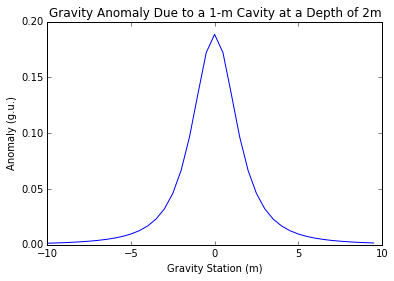

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(x,result)
plt.title('Gravity Anomaly Due to a 1-m Cavity at a Depth of 2m')
plt.xlabel('Gravity Station (m)')
plt.ylabel('Anomaly (g.u.)')
plt.show()

Is a cavity this size detectable.  The best we can reliably do in the field is about 5 microgals, which is .05 g.u. (1 g.u. = 100 ugal) so we have a chance since our peak anomaly is just under 20 ugal.  Any noise, though, and we're in trouble.  Microgravity is not a good way to look for 55gal drums!

Your Mission

Now it's your turn.  I want you to:

1.	Reproduce my result.
2.	Determine the radius of the sphere centered 2m down that will product a 5-ugal peak anomaly.
3.	Bonus problem: Calculate the gravity along a profile that misses going over the top of the sphere by 1 meter.
